In [511]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [512]:
# linear Regression

# y = wx+b
weight = 0.7
bias = 0.3
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [513]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [514]:
len(X), len(y)

(50, 50)

In [515]:
X_train,y_train = (X[:int(0.8 * len(X))], (y[:int(0.8 * len(y))]))
X_test,y_test = (X[int(0.8 * len(X)):], (y[int(0.8 * len(y)):]))


In [516]:
len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

In [517]:
def plot_predictions(
    x_train=X_train,
    y_train = y_train,
    x_test = X_test,
    y_test =y_test,
    prediction = None
):
    plt.figure(figsize=(10,7))
    plt.scatter(x_train,y_train,c="g",s=10,label="Training Data")
    # test data
    plt.scatter(x_test,y_test,c="b",s=5,label="Test Data")
    # plt.scatter(x_train,y_train)
    
    if prediction is not None:
        plt.scatter(x_test,prediction,c="y",s=5,label="Prediction Data")
        
    plt.legend()
    plt.show()

## Creating Models

To define a neural network in PyTorch, we create a class that inherits from nn.Module. 
We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. 

#### nn.Module 

nn.Module is base class for all neural network modules.
Your models should also subclass this class.


In [518]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        return self.weight * x + self.bias

In [519]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

print(f"Using {device} device")

torch.manual_seed(42)
model_0 = LinearRegression().to(device)
print(model_0)
list(model_0.parameters())

Using cpu device
LinearRegression()


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [520]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Required_Grad 
Context-manager that disables gradient calculation.

Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). 

It will reduce memory consumption for computations that would otherwise have requires_grad=True.
    
    >>> x = torch.tensor([1.], requires_grad=True)

    >>> with torch.no_grad():
    ...     y = x * 2
    >>> y.requires_grad
    False


    >>> @torch.no_grad()
    ... def doubler(x):
    ...     return x * 2
    >>> z = doubler(x)
    >>> z.requires_grad
    False


    >>> @torch.no_grad()
    ... def tripler(x):
    ...     return x * 3
    >>> z = tripler(x)
    >>> z.requires_grad
    False


    >>> # factory function exception
    >>> with torch.no_grad():
    ...     a = torch.nn.Parameter(torch.rand(10))
    >>> a.requires_grad
    True

In [521]:
x = torch.tensor(4.9,requires_grad=True)
print(x.requires_grad)

with torch.inference_mode():
    y = x+1
print(x.requires_grad)
print(y.requires_grad)

True
True
False


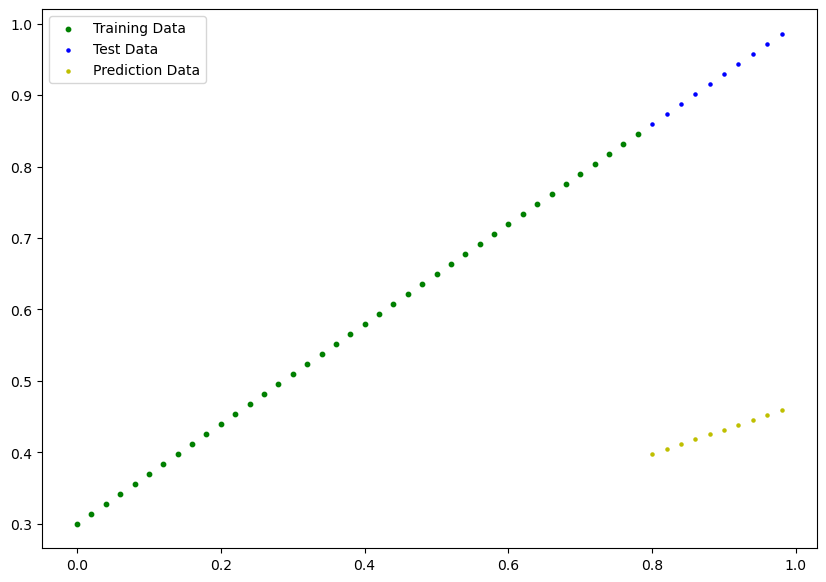

In [522]:
# Compute prediction error
# we know that we dont need the gradient descent to compute this time so we disable it by using no_grad
with torch.inference_mode():
    pred = model_0(X_test)
    

plot_predictions(prediction=pred)




## To train a model

In [523]:
# Optimizing the Model Paramet ers

# to train a model we need a loss function and optimizer
# loss function: loss function or cost function is used to measure how wrong our model predict the data
# optimizers are used to update the parameters of the model using gradient decenct to make them generalize for the data

# loss function
loss_fun = nn.L1Loss()

# Optimizer  Stochatic Gradient Descent 
optimizer  = torch.optim.SGD(model_0.parameters(),lr=0.01)


In PyTorch, optimizer.zero_grad() is a crucial method used within the training loop of a neural network. Its purpose is to reset the gradients of all parameters that the optimizer is tracking to None. 

In [524]:
epochs = 100
epochs_count = []
train_loss_value = []
test_loss_value = []

for epoch in range(epochs):
    model_0.train() 
   
    # forward pass
    y_pred = model_0(X_train)
    
    # loss/error of model
    loss = loss_fun(y_pred, y_train)
    print(f"Loss: {loss}")
     # Backpropagation
    loss.backward()
    optimizer.step()
    
    # this is important step
    optimizer.zero_grad() 
     
     
    #  testing mode
    
    model_0.eval()
    with torch.inference_mode():
    # with torch.no_grad()
        test_pred = model_0(X_test)
        test_loss = loss_fun(test_pred,X_test) 
        
        
    if epoch % 10 == 0:
        epochs_count.append(epoch)
        test_loss_value.append(test_loss)
        train_loss_value.append(loss)
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict(),"\n\n")
    
    
    
    

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4480651915073395
OrderedDict({'weight': tensor([0.3406]), 'bias': tensor([0.1388])}) 


Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3133552074432373
OrderedDict({'weight': tensor([0.3796]), 'bias': tensor([0.2388])}) 


Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.18429657816886902
OrderedDict({'weight': tensor([0.4184]), 'bias': tensor([0.3333])}) 


Loss: 0.08227583020925522
Loss: 0.076388

In [525]:
with torch.inference_mode():
    # with torch.no_grad()
    new_pred = model_0(X_test)
    # test_loss = loss_fun(new_pred,X_test) 
        

In [526]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

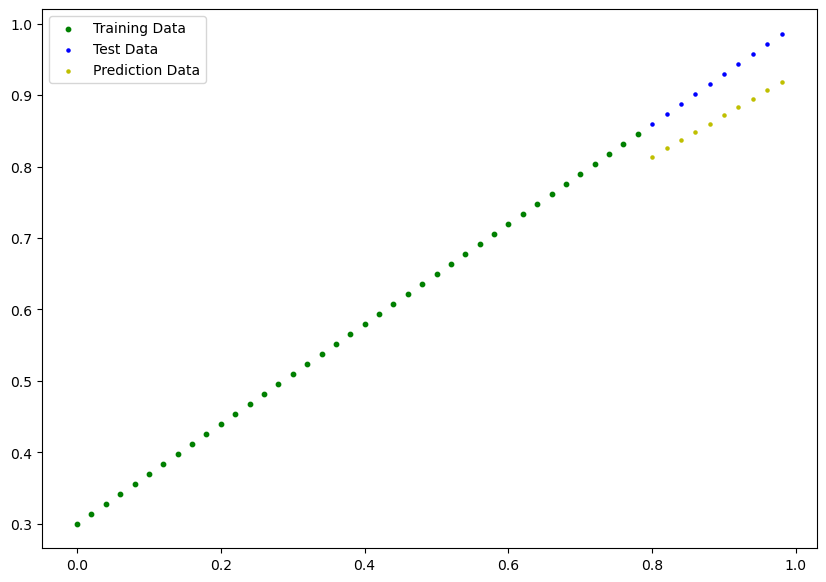

In [527]:
plot_predictions(prediction=new_pred)

In [528]:
test_loss_value

[tensor(0.4481),
 tensor(0.3134),
 tensor(0.1843),
 tensor(0.1116),
 tensor(0.0806),
 tensor(0.0662),
 tensor(0.0559),
 tensor(0.0476),
 tensor(0.0396),
 tensor(0.0333)]

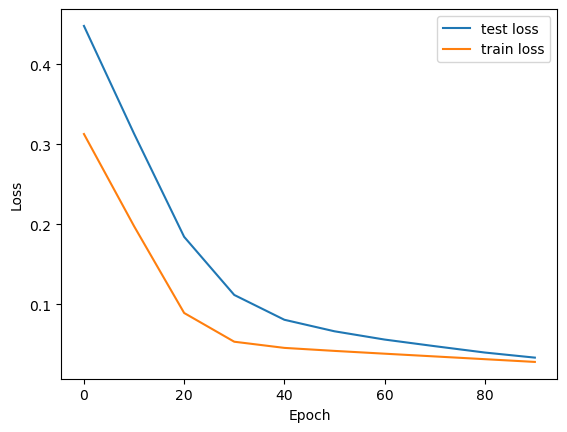

In [529]:
plt.plot(epochs_count,np.array(test_loss_value) ,label="test loss")
plt.plot(epochs_count,torch.tensor(train_loss_value).cpu().numpy() ,label="train loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Saving Models 
when it come to saving and loading of models, there are three core functions to be familiar with 

+ `torch.save`
+ `torch.load`
+ `torch.nn.Module.load_state_dict`

<img src="./Screenshot from 2025-07-07 13-55-32.png" height="400px" width="700px"/>

In [571]:
from pathlib import Path
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

model_name = "linearRegression_model_0.pth"
model_save_path = model_path / model_name


model_save_path

PosixPath('models/linearRegression_model_0.pth')

PosixPath('/a')

In [574]:
# save 
torch.save(model_0.state_dict(),model_save_path)
print(f"Saved Pytorch Model State to {model_save_path}")

Saved Pytorch Model State to models/linearRegression_model_0.pth


In [ ]:
model_0 = LinearRegression().to(device)
model_0.load_state_dict(torch.load(model_save_path,weights_only=True))


LinearRegression()

In [587]:
# save entire model 
# torch.save(model_0,"model.pth")
# model = torch.load("model.pth", weights_only=False)
# model.eval()
# with torch.inference_mode():
#     load_model_pred = model(X_test)



In [ ]:
model_0.eval()
with torch.inference_mode():
    load_model_pred = model_0(X_test)

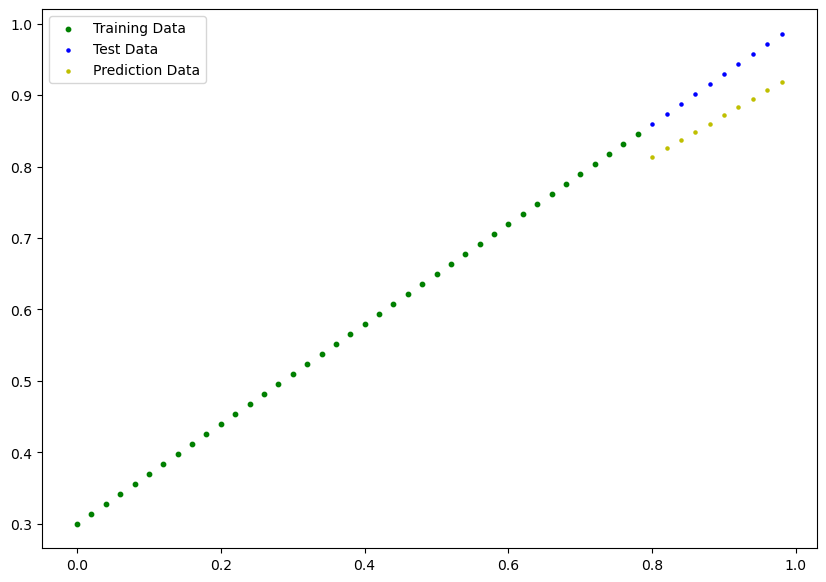

In [578]:
plot_predictions(prediction=load_model_pred)

In [589]:
# model prediction before and after loading of save parameters
new_pred == load_model_pred 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])